## Problem: Path with maximum Sum
LeetCode: 124. Binary Tree Maximum Path Sum

https://leetcode.com/problems/binary-tree-maximum-path-sum/

A path in a binary tree is a sequence of nodes where each pair of adjacent nodes in the sequence has an edge connecting them. A node can only appear in the sequence at most once. Note that the path does not need to pass through the root.

The path sum of a path is the sum of the node's values in the path.

Given the root of a binary tree, return the maximum path sum of any non-empty path.

 

Example 1:

    Input: root = [1,2,3]
    Output: 6
    Explanation: The optimal path is 2 -> 1 -> 3 with a path sum of 2 + 1 + 3 = 6.
Example 2:

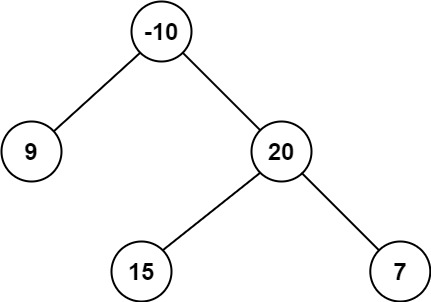

    Input: root = [-10,9,20,null,null,15,7]
    Output: 42
    Explanation: The optimal path is 15 -> 20 -> 7 with a path sum of 15 + 20 + 7 = 42.
 

Constraints:

    The number of nodes in the tree is in the range [1, 3 * 104].
    -1000 <= Node.val <= 1000

### Approach:

This problem belongs to Tree-DFS pattern. For more details:

The difference here is that:
1. We need to call recursive function 2 times, one for left child and one for right child
2. Calculate the maximum of branch sum of current node. That means get the maximum of (current node + left branch) or (current node + right branch) or current node value itself. This can be done by taking max branch  = maximum of left branch and right branch, then maximum of (max branch + current node, currrent node). 
3. Now, we have current node's max branch value. Calculate the path sum. Path sum = left branch + right branch + current node.
4. Maximum path sum of current node = max(pathsum, max branch sum)
5. Save the maximum path sum and current node maximum path sum.
6. Return max branch sum at current node.
    

In [47]:
class Node:
    def __init__(self, val, left = None, right = None):
        self.val = val
        self.left = left
        self.right = right
class TreeInfo:
    def __init__(self, maxSum = 0):
        self.maxSum = maxSum
def maxPathSum(root):
    info = TreeInfo()
    getMaxPathsum(root, info)
    return info.maxSum
def getMaxPathsum(root, info):
    if root is None:
        return 0
    leftPathSum = getMaxPathsum(root.left, info)
    rightPathSum = getMaxPathsum(root.right, info)
    maxBranchSum = max(leftPathSum, rightPathSum)
    maxSumAtCurrentNode = max(root.val + maxBranchSum, root.val)
    maxPathSum = max(leftPathSum + rightPathSum + root.val, maxSumAtCurrentNode)
    info.maxSum = max(info.maxSum, maxPathSum)
    return maxSumAtCurrentNode
    

In [44]:
root = Node(-10, Node(9), Node(20, Node(15), Node(7)))
maxPathSum(root)

42

In [45]:
root = Node(1, Node(-2), Node(3))
maxPathSum(root)

4

In [46]:
root = Node(5,Node(4, Node(11)), Node(8, Node(13, Node(7, None, Node(1)), Node(2)), Node(4)))
maxPathSum(root)
# Expected 48

49